In [1]:
# Import our dependencies

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv("Dataset.csv")


In [15]:
print(df.columns.values)

['encounter_id' 'patient_id' 'hospital_id' 'hospital_death' 'age' 'bmi'
 'elective_surgery' 'ethnicity' 'gender' 'height' 'hospital_admit_source'
 'icu_admit_source' 'icu_id' 'icu_stay_type' 'icu_type' 'pre_icu_los_days'
 'readmission_status' 'weight' 'albumin_apache' 'apache_2_diagnosis'
 'apache_3j_diagnosis' 'apache_post_operative' 'arf_apache'
 'bilirubin_apache' 'bun_apache' 'creatinine_apache' 'fio2_apache'
 'gcs_eyes_apache' 'gcs_motor_apache' 'gcs_unable_apache'
 'gcs_verbal_apache' 'glucose_apache' 'heart_rate_apache'
 'hematocrit_apache' 'intubated_apache' 'map_apache' 'paco2_apache'
 'paco2_for_ph_apache' 'pao2_apache' 'ph_apache' 'resprate_apache'
 'sodium_apache' 'temp_apache' 'urineoutput_apache' 'ventilated_apache'
 'wbc_apache' 'd1_diasbp_invasive_max' 'd1_diasbp_invasive_min'
 'd1_diasbp_max' 'd1_diasbp_min' 'd1_diasbp_noninvasive_max'
 'd1_diasbp_noninvasive_min' 'd1_heartrate_max' 'd1_heartrate_min'
 'd1_mbp_invasive_max' 'd1_mbp_invasive_min' 'd1_mbp_max' 'd1_mbp_mi

In [16]:
print(len(df))


91713


In [17]:
df2 = df[['hospital_death',
 'd1_heartrate_min', 'd1_heartrate_max',
 'd1_sysbp_min', 'd1_sysbp_max',
 'd1_diasbp_max', 'd1_diasbp_min', 'bmi', 
  'weight', 'age', 
  'd1_glucose_min', 'd1_glucose_max',
  
  ]].copy()

In [18]:
# This was used to get 10% of the dataset to run a quick machine learning model. 
df2 = df2.sample(frac=0.1, replace=True, random_state=1)


In [19]:
df2.dropna(inplace=True)
X = df2.drop('hospital_death', axis=1)
X = pd.get_dummies(X)
y = df2['hospital_death'] != 1
df3 = X

In [20]:
df3

,d1_heartrate_min,d1_heartrate_max,d1_sysbp_min,d1_sysbp_max,d1_diasbp_max,d1_diasbp_min,bmi,weight,age,d1_glucose_min,d1_glucose_max
77708,71.0,109.0,130.0,188.0,113.0,59.0,27.089947,67.2,64.0,152.0,272.0
5192,72.0,89.0,79.0,133.0,81.0,37.0,28.755829,83.3,76.0,82.0,96.0
50057,60.0,107.0,93.0,155.0,93.0,54.0,35.274872,108.4,52.0,118.0,178.0
73349,61.0,97.0,121.0,144.0,72.0,67.0,39.728079,132.9,28.0,126.0,126.0
21440,101.0,121.0,121.0,167.0,120.0,88.0,22.714002,54.5,30.0,82.0,404.0
...,...,...,...,...,...,...,...,...,...,...,...
32169,38.0,92.0,97.0,151.0,98.0,58.0,20.677961,59.9,54.0,100.0,124.0
60786,59.0,93.0,80.0,132.0,56.0,23.0,41.038233,108.5,66.0,113.0,347.0
64166,60.0,95.0,119.0,164.0,125.0,68.0,47.304602,161.9,46.0,98.0,154.0
27758,60.0,66.0,103.0,129.0,88.0,62.0,32.075913,96.0,69.0,114.0,114.0


In [21]:
X.columns

Index(['d1_heartrate_min', 'd1_heartrate_max', 'd1_sysbp_min', 'd1_sysbp_max',
       'd1_diasbp_max', 'd1_diasbp_min', 'bmi', 'weight', 'age',
       'd1_glucose_min', 'd1_glucose_max'],
      dtype='object')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn import tree

In [24]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X, y)
tree_clf.score(X, y)

1.0

In [25]:
fn = X.columns

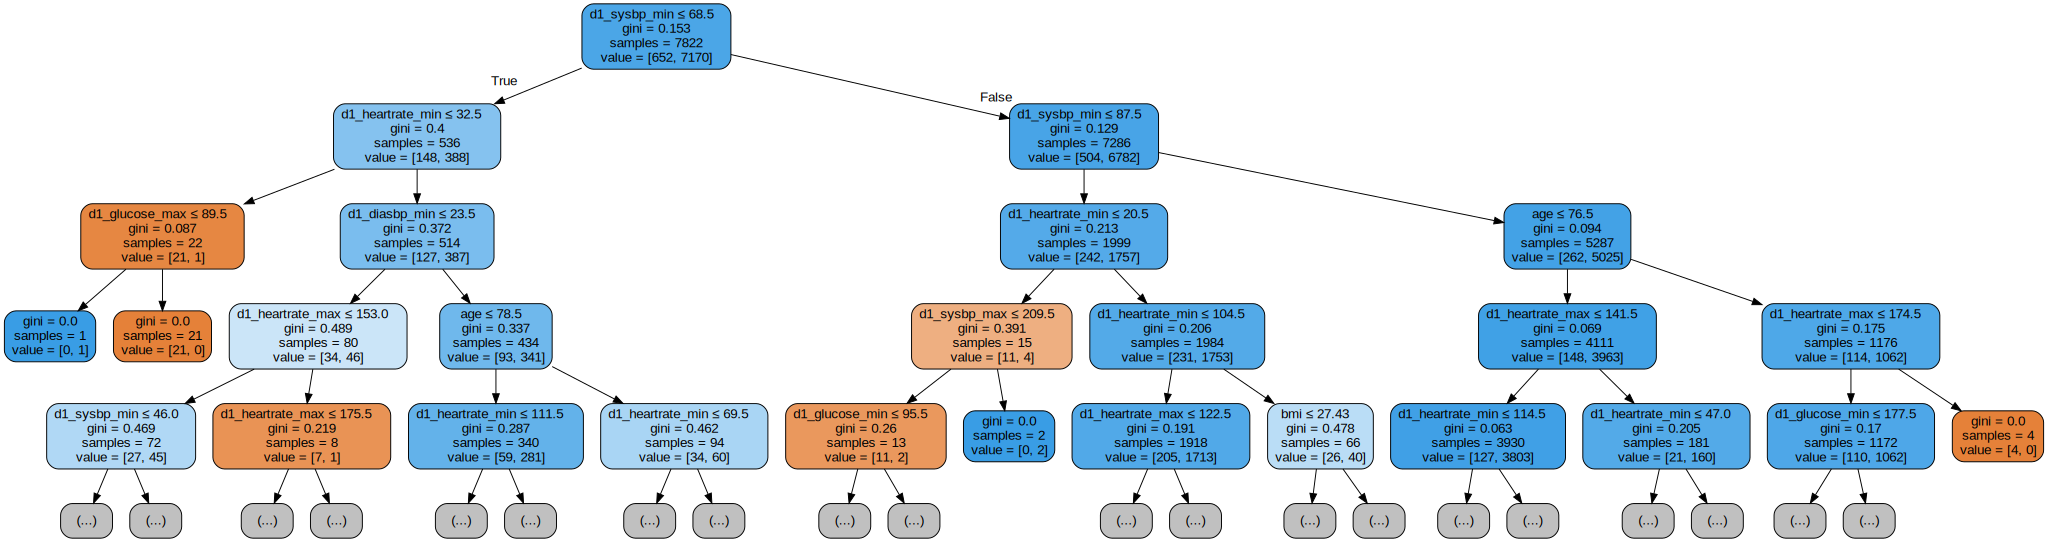

In [26]:
# Create a decision tree graph
import graphviz 
dot_data = tree.export_graphviz(
    tree_clf, out_file=None,
    max_depth=4, 
    feature_names = fn,
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('clf_tree_vis.png')

graph = graphviz.Source(dot_data)  
graph 